130.44419753076895
137.14740329162052


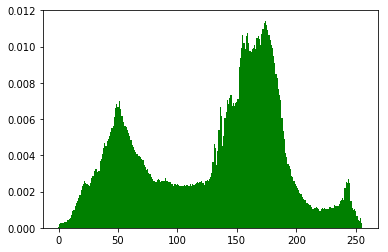

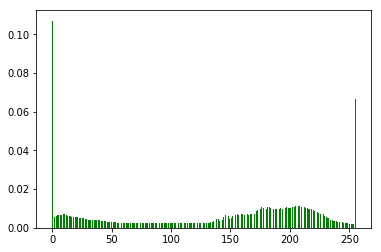

-1

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('1.jpg',1)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
dst = np.zeros(img.shape,np.uint8)
dst_gray = np.zeros((height,width,1),np.uint8)
count = np.zeros(256,np.float32)
area_threshold = np.float32(0.2)#阈值，找到积分对应点，确定图像的直方图拉伸范围,为次要参数
rflxChange = 60#改变量百分比，确定图像的直方图伸缩比例，为主要参数
rflxChange /= 100


totalGray=np.float32(0)
for i in range(0,height):#计算概率分布
    for j in range(0,width):
        pixel = gray[i,j]
        index = int(pixel)
        count[index]+=1
        totalGray+=gray[i,j]/height/width
print(totalGray)
        
    
for i in range(0,256):#归一化
    count[i] /=height*width
sumCount = float(0)
newCount = np.zeros(256,np.float32)
for i in range(0,255):#概率分布积分
    sumCount+=count[i]
    newCount[i]=sumCount
    
    
area_up = 0  #找到映射上下界算mid,其实还有多种方法算mid
area_down = 0
for i in range(0,255):
    if newCount[i]<=area_threshold and newCount[i+1]>=area_threshold:
        area_down = i
    if newCount[i]<=1-area_threshold and newCount[i+1]>=1-area_threshold:
        area_up = i
    area_mid =(area_down+area_up)/2 
    #if newCount[i]<=0.5 and newCount[i+1]>=0.5:
        #area_mid = i
    #area_mid =127

    
newTotalGray=np.float32(0)
for i in range(0,height):                 #计算映射表及映射
    for j in range(0,width):
        newGray=area_mid-(area_mid-gray[i,j])*(1+rflxChange)
        if newGray > 255:
            newGray=255
        if newGray < 0:
            newGray=0
        dst_gray[i,j]=newGray
        newTotalGray+=newGray/height/width
print(newTotalGray)
        
        
for i in range(0,height): #GRAY2BGR
    for j in range(0,width):
        (b,g,r) = img[i,j]
        if gray[i,j]!=0:
            b*= dst_gray[i,j]/gray[i,j]*(totalGray/newTotalGray) #保证亮度不变
            g*= dst_gray[i,j]/gray[i,j]*(totalGray/newTotalGray)
            r*= dst_gray[i,j]/gray[i,j]*(totalGray/newTotalGray)
            if b>255:
                b=255
            if b<0:
                b=0
            if g>255:
                g=255
            if g<0:
                g=0
            if r>255:
                r=255
            if r<0:
                r=0
        dst[i,j] = (b,g,r)


count = np.zeros(256,np.float32)#输出原图直方图
for i in range(0,height):
    for j in range(0,width):
        pixel = gray[i,j]
        index = int(pixel)
        count[index]+=1
for i in range(0,256):
    count[i] /=height*width
x = np.linspace(0,255,256)#0-255,256等分
y = count
plt.bar(x,y,1.0,alpha=1,color='g')
plt.show()
plt.figure()


count = np.zeros(256,np.float32)#输出新图直方图
for i in range(0,height):
    for j in range(0,width):
        pixel = dst_gray[i,j]
        index = int(pixel)
        count[index]+=1
for i in range(0,256):
    count[i] /=height*width
x = np.linspace(0,255,256)#0-255,256等分
y = count
plt.bar(x,y,1.0,alpha=1,color='g')
plt.show()

        
cv2.imshow('dst',dst)
cv2.imshow('src',img)
cv2.imwrite('contrast.jpg',dst)
cv2.waitKey(0)
        
    
    
    
